In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:

# Ensure output directory exists
# os.makedirs('reports', exist_ok=True)


In [3]:
# Load data
df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='\t')
df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='|')
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])


C:\Users\belet\AppData\Local\Temp\ipykernel_16880\1515477265.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MachineLearningRating_v3.txt', sep='|')


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [23]:
# Data Summarization
def summarize_data(df):
    numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CapitalOutstanding', 'CalculatedPremiumPerTerm']
    summary = df[numerical_cols].describe()
    dtypes = df.dtypes
    missing_values = df.isnull().sum()
    with open('data/data_summary.txt', 'w') as f:
        f.write("Descriptive Statistics:\n")
        f.write(str(summary) + "\n\n")
        f.write("Data Types:\n")
        f.write(str(dtypes) + "\n\n")
        f.write("Missing Values:\n")
        f.write(str(missing_values))
    return summary, dtypes, missing_values
summary, dtypes, missing_values = summarize_data(df)

In [24]:
summarize_data(df)

(       TotalPremium   TotalClaims  CustomValueEstimate    SumInsured  \
 count  1.000098e+06  1.000098e+06         2.204560e+05  1.000098e+06   
 mean   6.190550e+01  6.486119e+01         2.255311e+05  6.041727e+05   
 std    2.302845e+02  2.384075e+03         5.645157e+05  1.508332e+06   
 min   -7.825768e+02 -1.200241e+04         2.000000e+04  1.000000e-02   
 25%    0.000000e+00  0.000000e+00         1.350000e+05  5.000000e+03   
 50%    2.178333e+00  0.000000e+00         2.200000e+05  7.500000e+03   
 75%    2.192982e+01  0.000000e+00         2.800000e+05  2.500000e+05   
 max    6.528260e+04  3.930921e+05         2.655000e+07  1.263620e+07   
 
        CalculatedPremiumPerTerm  
 count              1.000098e+06  
 mean               1.178757e+02  
 std                3.997017e+02  
 min                0.000000e+00  
 25%                3.224800e+00  
 50%                8.436900e+00  
 75%                9.000000e+01  
 max                7.442217e+04  ,
 UnderwrittenCoverID     

In [26]:
# Data Quality Assessment
def assess_data_quality(df):
    df = df.copy()
    # Impute missing values
    for col in ['TotalPremium', 'CustomValueEstimate']:
        df[col].fillna(df[col].median(), inplace=True)
    # Convert CapitalOutstanding to numeric before imputing
    df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
    df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median(), inplace=True)
    return df

df = assess_data_quality(df)


C:\Users\belet\AppData\Local\Temp\ipykernel_16880\3405735630.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\belet\AppData\Local\Temp\ipykernel_16880\3405735630.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [27]:
# Add LossRatio and VehicleAge columns
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['VehicleAge'] = 2015 - df['RegistrationYear']


In [ ]:

# Univariate Analysis: Distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TotalPremium'], kde=True)
plt.title('Distribution of Total Premium')
plt.subplot(1, 3, 2)
sns.histplot(df['TotalClaims'], kde=True)
plt.title('Distribution of Total Claims')
plt.subplot(1, 3, 3)
sns.histplot(df['CustomValueEstimate'], kde=True)
plt.title('Distribution of Custom Value Estimate')
plt.tight_layout()
# plt.savefig('reports/distributions.png')
plt.show()


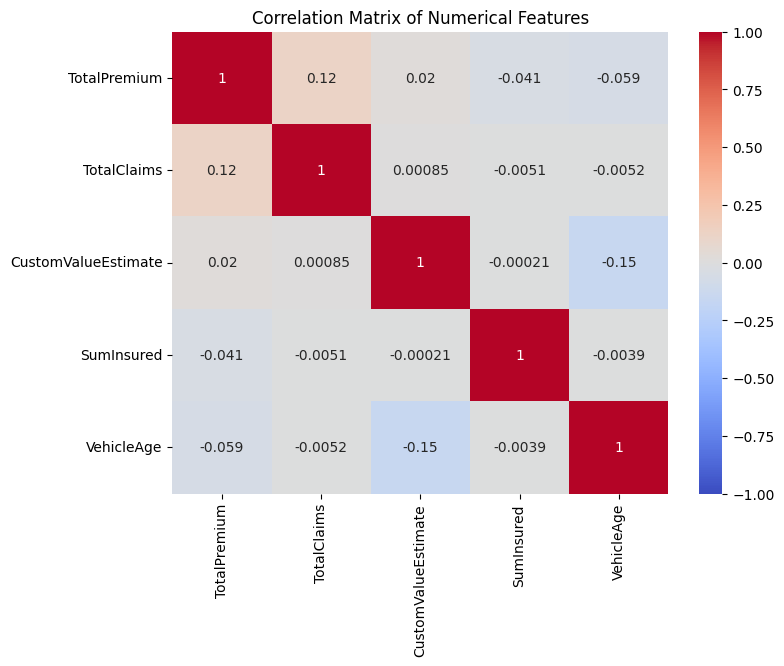

In [13]:

# Bivariate Analysis: Correlation Matrix
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'VehicleAge']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


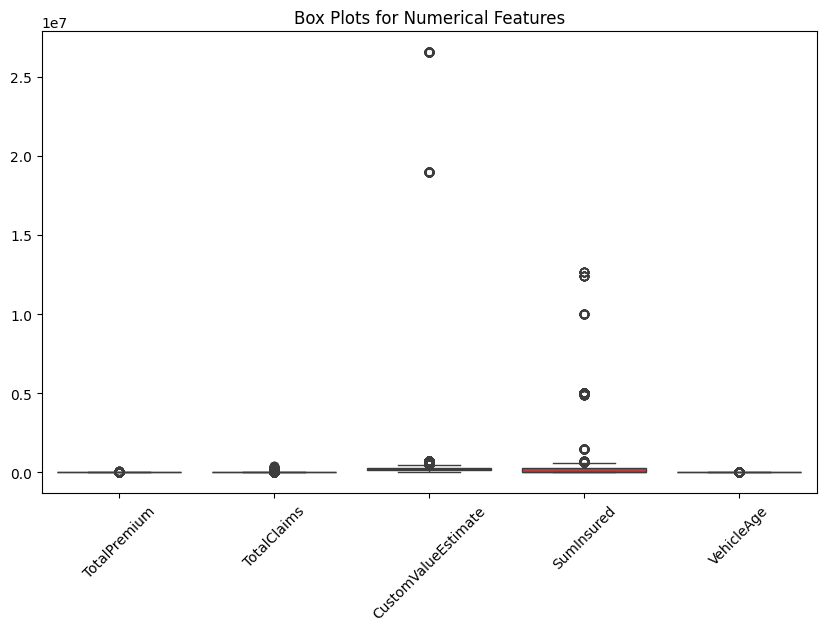

In [14]:

# Outlier Detection: Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()


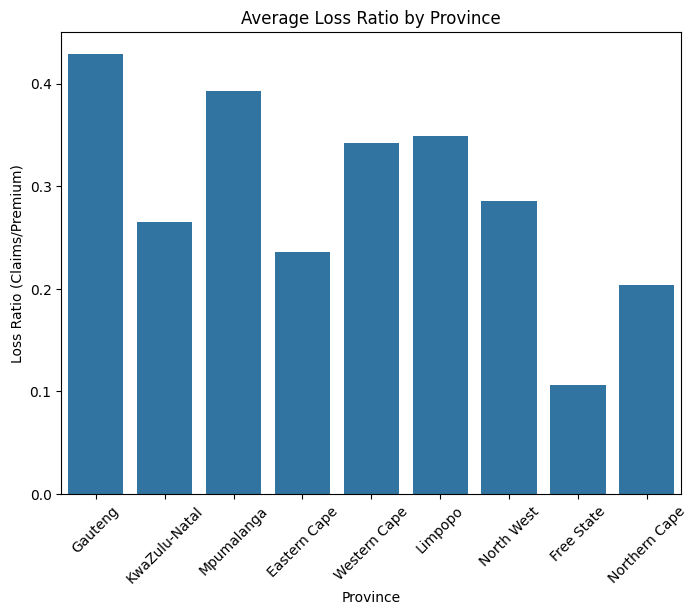

In [15]:

# Insightful Visualizations
# 1. Loss Ratio by Province
plt.figure(figsize=(8, 6))
sns.barplot(x='Province', y='LossRatio', data=df, errorbar=None)
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio (Claims/Premium)')
plt.xticks(rotation=45)
plt.show()


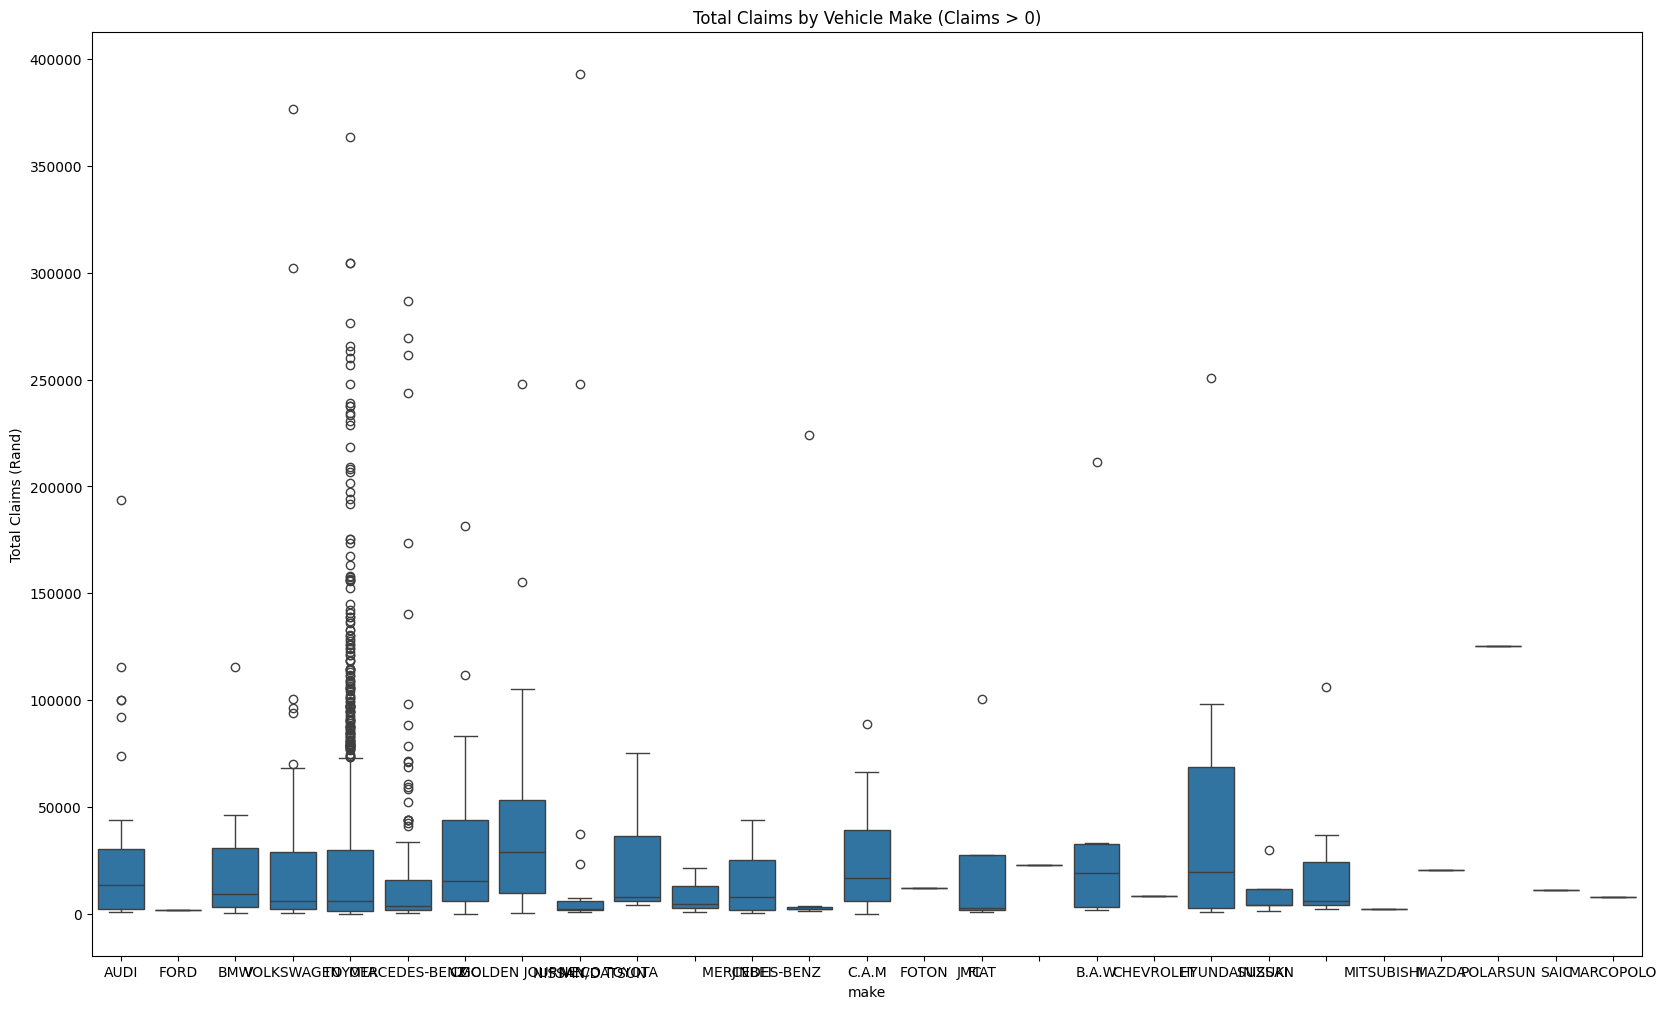

In [19]:
# 2. Total Claims by Make
plt.figure(figsize=(20, 12))
sns.boxplot(x='make', y='TotalClaims', data=df[df['TotalClaims'] > 0])
plt.title('Total Claims by Vehicle Make (Claims > 0)')
plt.ylabel('Total Claims (Rand)')
plt.show()


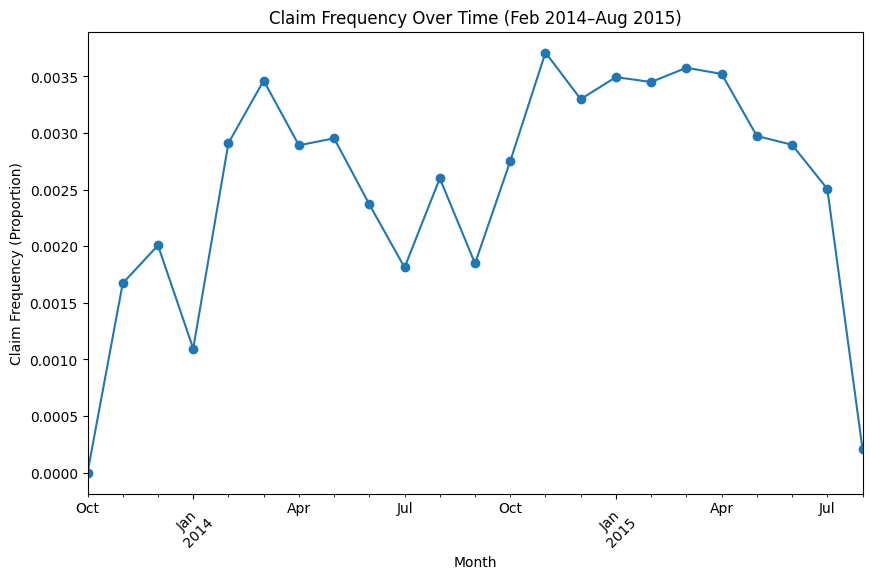

In [20]:

# 3. Temporal Trend of Claim Frequency
df['ClaimMonth'] = df['TransactionMonth'].dt.to_period('M')
claim_freq = df.groupby('ClaimMonth')['TotalClaims'].apply(lambda x: (x > 0).mean())
plt.figure(figsize=(10, 6))
claim_freq.plot(kind='line', marker='o')
plt.title('Claim Frequency Over Time (Feb 2014–Aug 2015)')
plt.ylabel('Claim Frequency (Proportion)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()
